In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

# First look
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
# Shape & basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

# Statistical summary
df.describe()

Shape: (2200, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [3]:
# Missing values
print(df.isnull().sum())

# Duplicates
print("Duplicates:", df.duplicated().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
Duplicates: 0


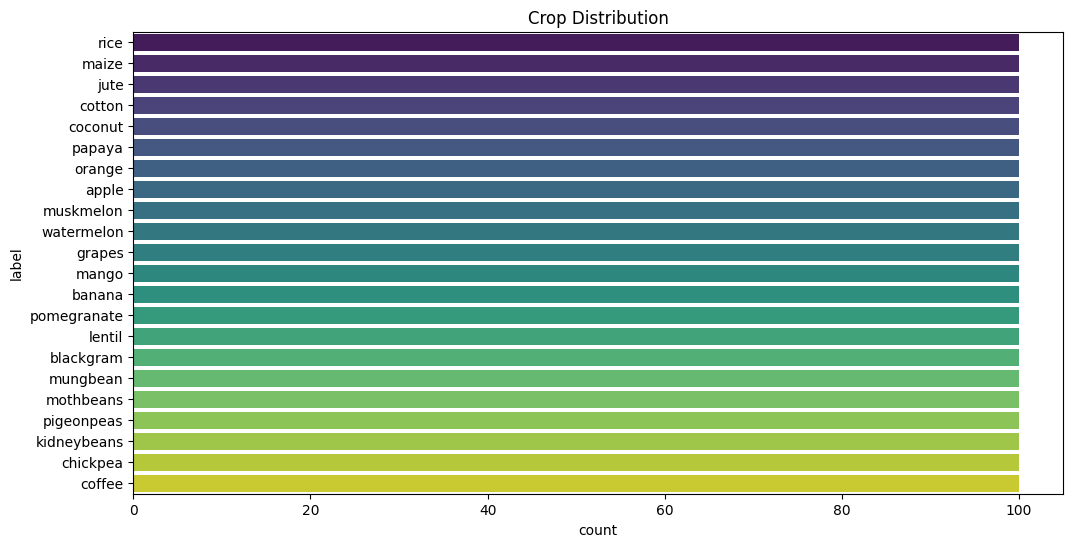

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette="viridis")
plt.title("Crop Distribution")
plt.show()

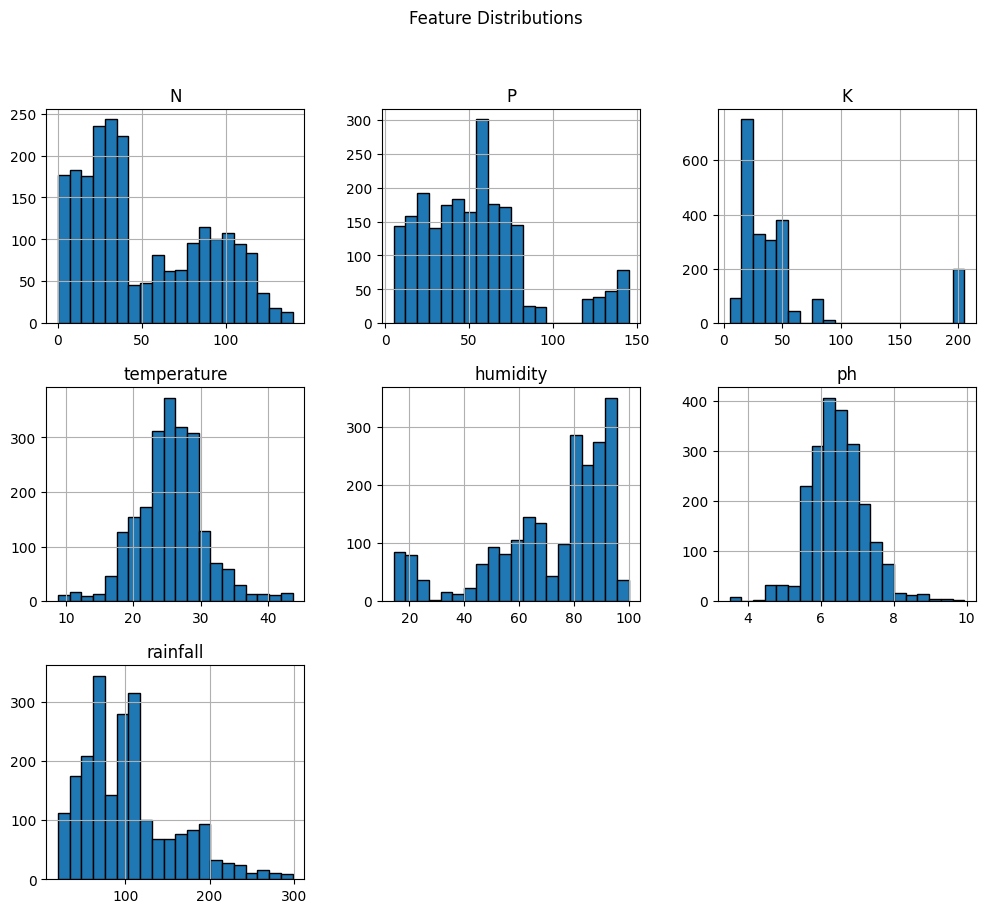

In [5]:
df.hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

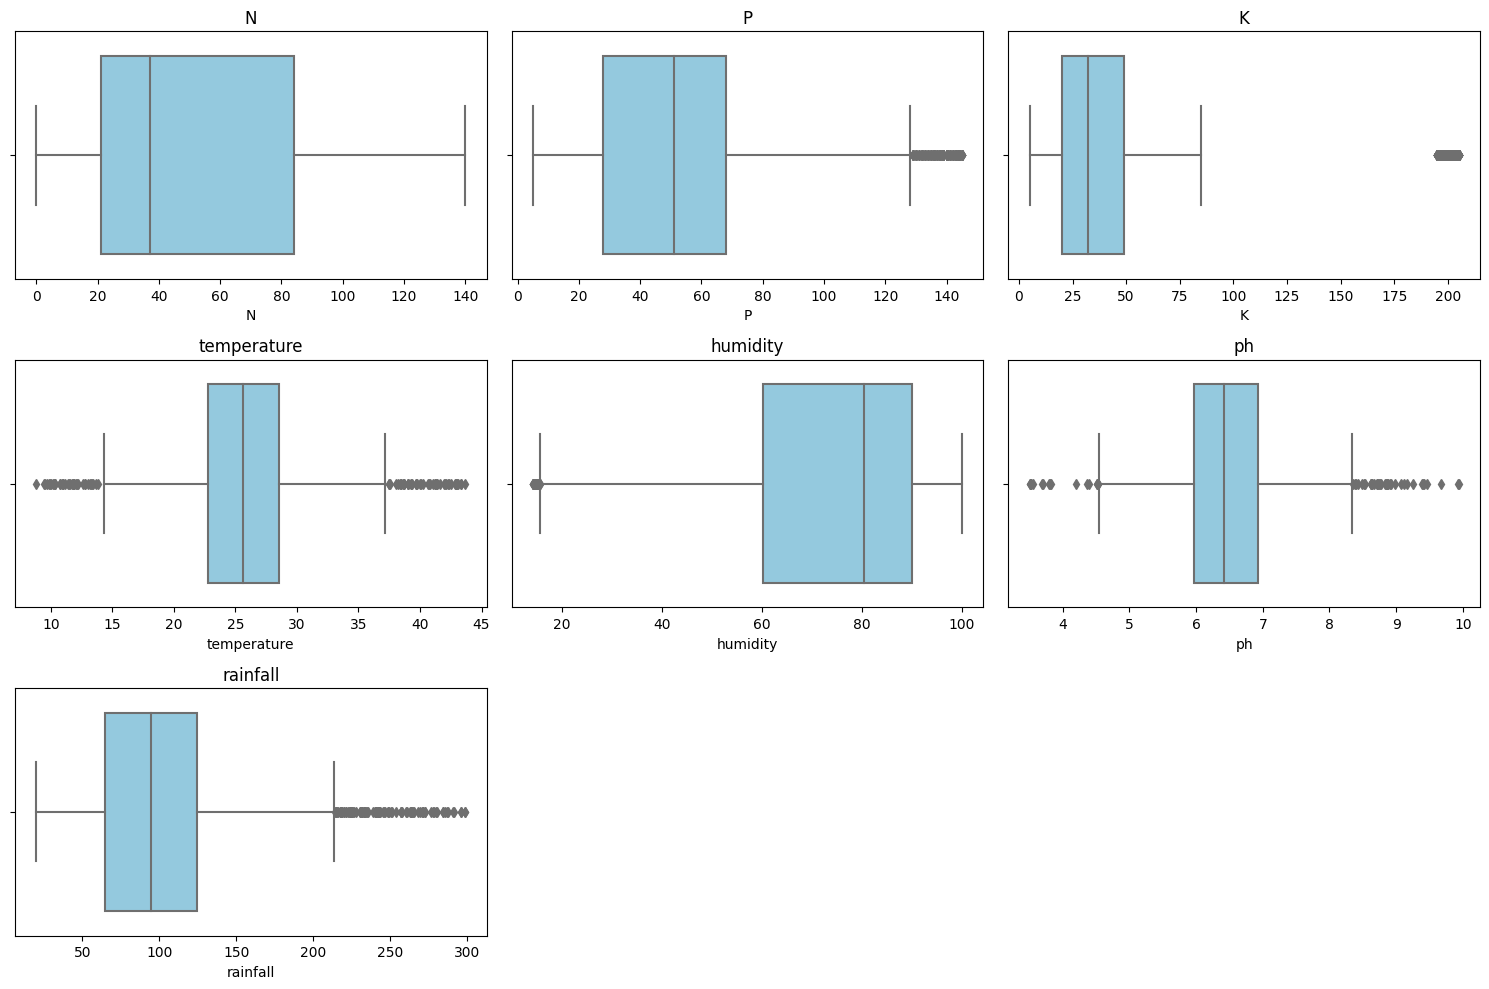

In [6]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.drop(columns="label").columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

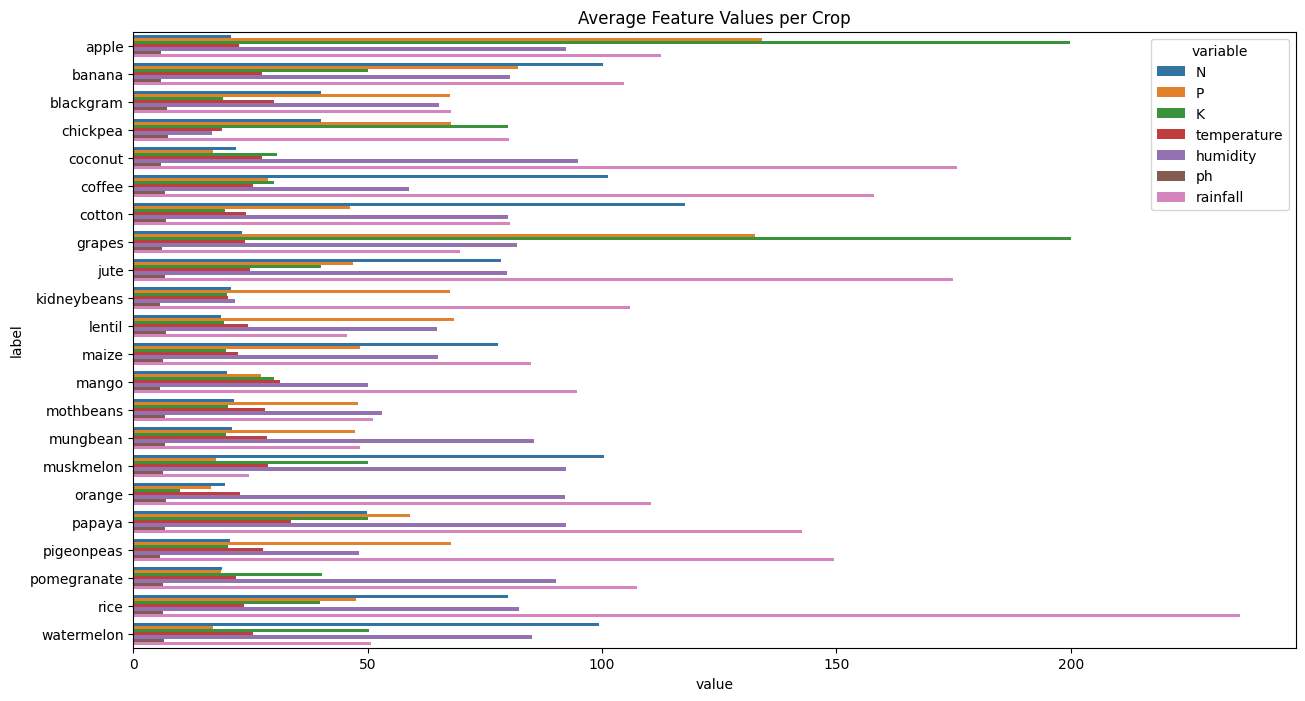

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(data=df.groupby("label").mean(numeric_only=True).reset_index().melt(id_vars="label"), 
            x="value", y="label", hue="variable")
plt.title("Average Feature Values per Crop")
plt.show()

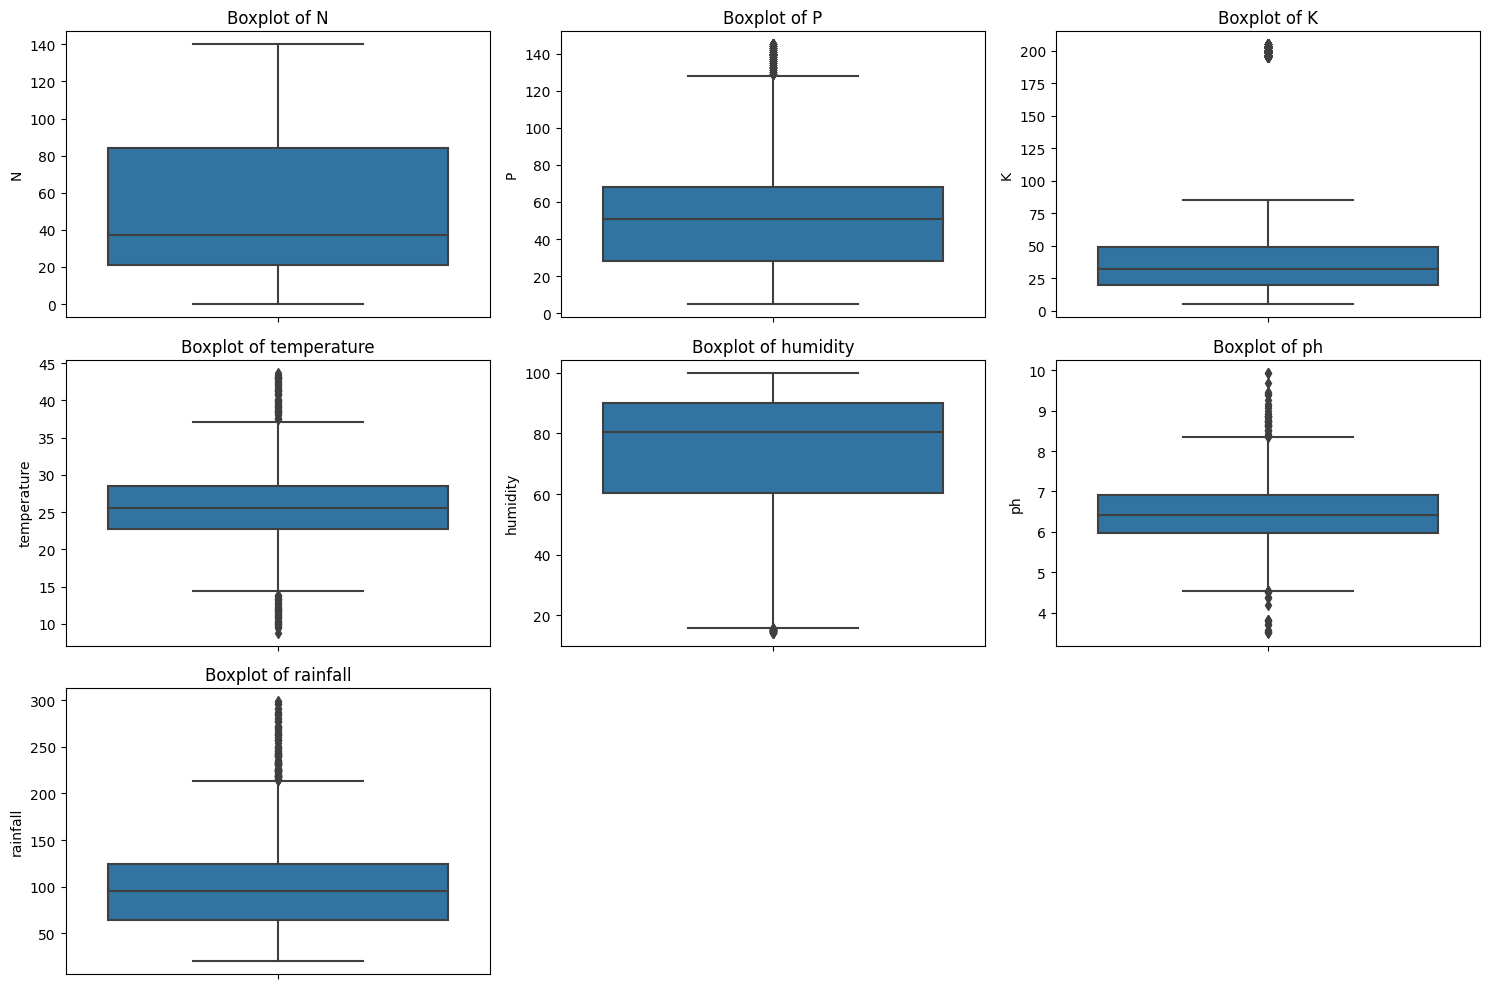

In [15]:
features = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])
df[["label", "label_encoded"]].head()


,label,label_encoded
0,rice,20
1,rice,20
2,rice,20
3,rice,20
4,rice,20


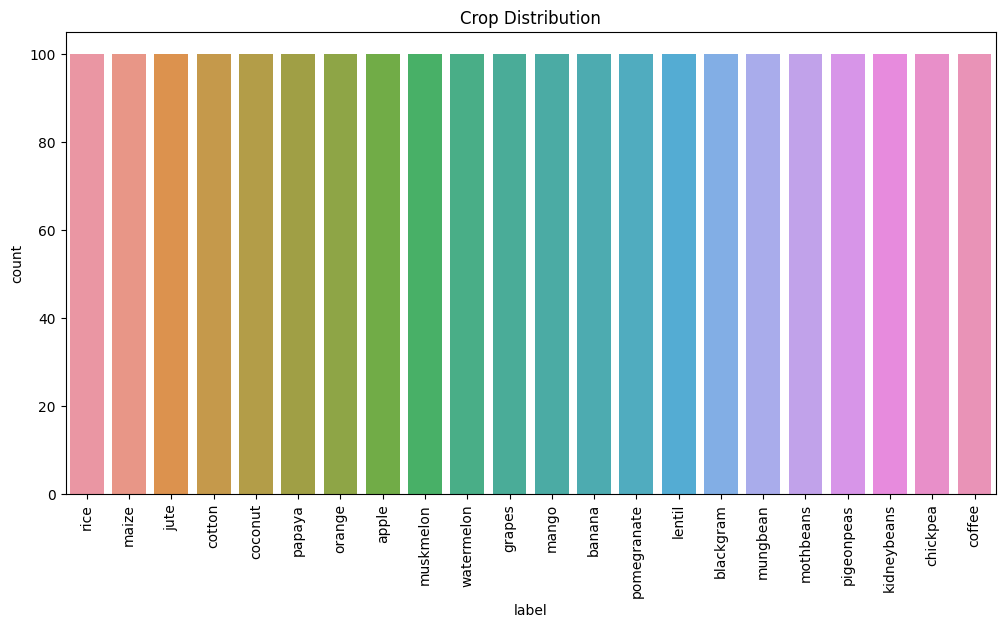

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x="label", data=df, order=df["label"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()
